# Fraud - Genuine Transactions Classification

## Importing all the necessary libraries

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import statsmodels.api as sm

## Importing the dataset

In [79]:
df = pd.read_csv("/Users/rakshitbatra/Downloads/Fraud.csv")

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Initial Analysis of the dataset

In [28]:
df.shape

(6362620, 11)

In [29]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Plotting box-plot for Outlier detection

(0.0, 800000.0)

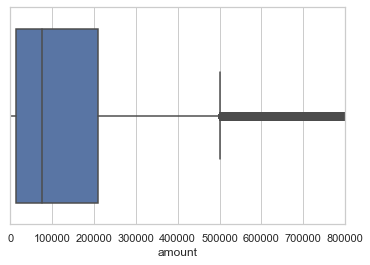

In [114]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["amount"])
ax.set_xlim(0,800000)

## Checking for Data Types

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Checking for the null values in the dataset

In [32]:
for i in df:
    print(i,":",df[i].isna().sum())

step : 0
type : 0
amount : 0
nameOrig : 0
oldbalanceOrg : 0
newbalanceOrig : 0
nameDest : 0
oldbalanceDest : 0
newbalanceDest : 0
isFraud : 0
isFlaggedFraud : 0


In [33]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [34]:
#minvalue
minvalue = df['amount'].min()
print(minvalue)

0.0


In [35]:
#maxvalue
maxvalue = df['amount'].max()
print(maxvalue)

92445516.64


In [36]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## Performing One-Hot Encoding on column = 'type' 

In [40]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [60]:
cat_cols = ["type"]
cat_cols_encoded = []
for col in cat_cols:
    cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(df[col].unique())]

cat_cols_encoded

['t_PAYMENT', 't_TRANSFER', 't_CASH_OUT', 't_DEBIT', 't_CASH_IN']

## Joining dataset with encoded values

In [61]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(df[cat_cols])
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
df_oh = df.join(df_enc)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,t_PAYMENT,t_TRANSFER,t_CASH_OUT,t_DEBIT,t_CASH_IN
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.0,1.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0


In [63]:
df_oh.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,t_PAYMENT,t_TRANSFER,t_CASH_OUT,t_DEBIT,t_CASH_IN
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0


## Dropping columns with String Type

In [72]:
df_oh.drop(['nameOrig','nameDest'], inplace= True, axis= 1)

In [73]:
df_oh.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,t_PAYMENT,t_TRANSFER,t_CASH_OUT,t_DEBIT,t_CASH_IN
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0


In [74]:
df_oh.shape

(6362620, 13)

## Checking for Multicollinearity

In [75]:
Y = df_oh["isFraud"]
X = df_oh.drop(["isFraud"], axis= 1)

## VIF (Variable Inflation Factors)

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [123]:
calc_vif(X)

,variables,VIF
0,step,1.002763
1,amount,4.045355
2,oldbalanceOrg,555.056288
3,newbalanceOrig,571.601333
4,oldbalanceDest,68.106455
5,newbalanceDest,78.400275
6,isFlaggedFraud,1.000648
7,t_PAYMENT,2.758856
8,t_TRANSFER,2.093055
9,t_CASH_OUT,1.021090


## Dropping one of the Columns with high VIF [VIF Exceeding 5 or 10 indicates high collinearity]

In [124]:
df_oh.drop(['newbalanceOrig','newbalanceDest'], inplace= True, axis= 1)

In [126]:
Y = df_oh["isFraud"]
X = df_oh.drop(["isFraud"], axis= 1)

## Now, checking VIF again 

In [127]:
calc_vif(X)

,variables,VIF
0,step,1.001515
1,amount,1.252347
2,oldbalanceOrg,1.347484
3,oldbalanceDest,1.135756
4,isFlaggedFraud,1.000207
5,t_PAYMENT,2.160514
6,t_TRANSFER,2.077706
7,t_CASH_OUT,1.021025
8,t_DEBIT,1.998838
9,t_CASH_IN,1.475094


## Now, MultiCollinearity is removed successfully

## Performing Train-Test Split

In [128]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (4453834, 10)
Shape of test_X:  (1908786, 10)


## Initialising the models

In [129]:
#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

## Training the models and getting the testing accuracy

In [130]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.95541668893213
Decision Tree Score:  99.93189388438516


### Creating a function for getting, accuracy, precision, recall and f-1 score 

In [131]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

## Confusion matrix for Decision Tree 

In [132]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[1905691     660]
 [    640    1795]]


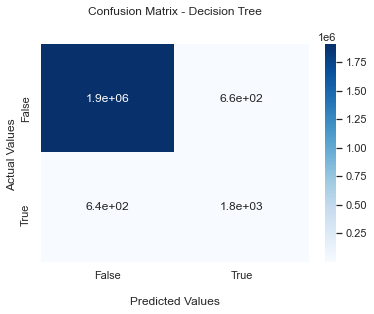

In [133]:
ax = sns.heatmap(confusion_matrix_dt, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [134]:
print("Evaluation of Decision Tree")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree

Accuracy: 0.99932
Precision: 0.73116
Recall: 0.73717
F1-score: 0.73415


## Confusion Matrix for Random Forest Regressor

In [135]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906231     120]
 [    731    1704]]


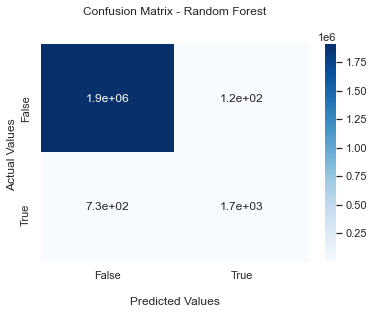

In [136]:
ax = sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [137]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99955
Precision: 0.93421
Recall: 0.69979
F1-score: 0.80019


### According to F-1 Score Analysis we'll select Random Forest Regressor since it has better F-1 Score than that of Decision Tree.

## Variable Selection:

1. Dropping Columns with String type:
   'nameDest' and 'nameOrig'
2. Dropping Columns with High Multicollinearity:
   'newbalanceOrig' and 'newbalanceDest'
3. Performing One - Hot Encoding on Column 'type'

Hence, selecting all other columns for training

## Factors to Predict Fradulant Customers and Why they are Chosen :

1. Transaction Type 
2. Amount of Transaction
3. Updated balance of reciever's as well as sender's account in case     of Deposit.
4. Old balance of both reciever's as well as sender's address.
5. Step where it maps a unit of time in the real world. In this case 1    step is 1 hour of time. Total steps 744 (30 days simulation).

More details which were not part of the dataset can be Contact details of Fraudulant Customers. These Factors are sufficient for because having more factors may lead to 'Curse of Dimensionality' in this case.

## Preventions that should be adopted while company update its infrastructure:

1. company should use trained ML Model to classify these fraudulant transactions.
2. Judging their pattern of transactions based on time, amount, and type of transaction performed.
3. Company should immediately short time ban that customer to perform any further transactions, and issue a soft warning.
4. Even After Issuing of Soft Warning the fraudulant transactions continue to occur then issue a hard warning with longer time period and that will be the last warning to the customer after that their account will no longer exist for any type of transactions.

## Verifying the actions implemented:

Since, company has the data for the transactions performed on their platform. We can again train our model on new data and check for number of fraud transactions, whether they've decreased or not. If there are lesser number of fraudulant transaction then we can determine that our actions have worked.